In [57]:
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras import regularizers, optimizers
#Import from keras_preprocessing not from keras.preprocessing

In [32]:
import cv2
import glob
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:

img_path = 'C:/Users/Rishabh/Desktop/3rd sem fodenge/DS3 project/dataset/'
# Load color image 
# files = []
# ext = ['png', 'jpg', 'gif']    # Add image formats here
# #hail
# [files.extend(glob.glob(img_path +'hail/'+ '*.' + e)) for e in ext]
# hail = [np.array(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY).astype("float32")/255) for file in files]
# #dew
# [files.extend(glob.glob(img_path +'dew/'+ '*.' + e)) for e in ext]
# dew = [np.array(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY).astype("float32")/255) for file in files]
# #glaze
# [files.extend(glob.glob(img_path +'glaze/'+ '*.' + e)) for e in ext]
# glaze = [cv2.imread(file) for file in files]

hail=os.listdir(img_path + "/" + "hail")
dew=os.listdir(img_path + "/" + "dew")

df=pd.DataFrame(columns=("image","lable"))

# class_names = sorted(os.listdir(img_path))
# class_names=["hail","dew"]
# for j in class_names:
#     for i in range(len(eval(j))):
#         df.loc[len(df.index)] = [eval(j)[i],class_names.index(j)] 

for i in hail:
    df.loc[len(df.index)] = [i,"hail"]
for i in dew:
    df.loc[len(df.index)] = [i,"dew"]  
df.to_csv("csv_file.csv")
# bgr_img = cv2.imread(img_path)
# # Convert to grayscale
# gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# # Normalize, rescale entries to lie in [0,1]
# gray_img = gray_img.astype("float32")/255
# # Plot image
# plt.imshow(gray_img, cmap='gray')
# plt.show()

In [71]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# train_images,train_lables,test_images,test_labels = train_test_split(df["image"],df["lable"],test_size=0.3,shuffle=True)
train_images = train_gen.flow_from_dataframe(dataframe=df,directory=img_path + "/" + "all", x_col="image",y_col="lable", class_mode="categorical", subset='training', shuffle=True, batch_size=32,target_size=(32,32))
test_images = train_gen.flow_from_dataframe(dataframe= df,directory=img_path + "/" + "all",x_col="image",y_col="lable", class_mode="categorical", subset='validation', shuffle=True, batch_size=32,target_size=(32,32))


# train_images=tf.convert_to_tensor(train_images)
# X = np.asarray(X).astype(np.float32)
# train_images=np.asarray(train_images).astype(np.float32)
# train_labels=np.asarray(train_lables).astype(np.float32)
# test_images=np.asarray(test_images).astype(np.float32)
# test_labels=np.asarray(test_labels).astype(np.float32)

# X_train1 = K.cast_to_floatx(train_images)
# y_train1 = K.cast_to_floatx(test_images)
# data_set=np.array(datasets.cifar10.load_data())
# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

Found 1032 validated image filenames belonging to 2 classes.
Found 257 validated image filenames belonging to 2 classes.


KeyError: 0

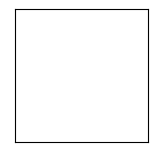

In [25]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
            #    'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [61]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

history = model.fit(train_images, epochs=10, 
                    validation_data=test_images)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [75]:

history=model.fit_generator(generator=train_images,steps_per_epoch=1,validation_steps=1,
                    validation_data=test_images,
                    epochs=10
)

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_5668\355476825.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_images,steps_per_epoch=1,validation_steps=1,


Epoch 1/10
1/1 [==============================] - 1s 601ms/step - loss: 0.6624 - accuracy: 0.6250 - val_loss: 0.3334 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 477ms/step - loss: 0.4312 - accuracy: 0.7812 - val_loss: 0.5657 - val_accuracy: 0.9062
Epoch 3/10
1/1 [==============================] - 0s 491ms/step - loss: 0.3754 - accuracy: 0.8125 - val_loss: 0.5339 - val_accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 462ms/step - loss: 0.3224 - accuracy: 0.8125 - val_loss: 0.9960 - val_accuracy: 0.7188
Epoch 5/10
1/1 [==============================] - 0s 389ms/step - loss: 0.4292 - accuracy: 0.8438 - val_loss: 0.9117 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 461ms/step - loss: 0.6100 - accuracy: 0.6875 - val_loss: 0.9406 - val_accuracy: 0.6562
Epoch 7/10
1/1 [==============================] - 0s 416ms/step - loss: 0.3078 - accuracy: 0.8438 - val_loss: 1.0017 - val_accuracy: 0.6250
Epoch 8/10
1/1 [====

9/9 - 1s - loss: 0.6431 - accuracy: 0.9377 - 763ms/epoch - 85ms/step


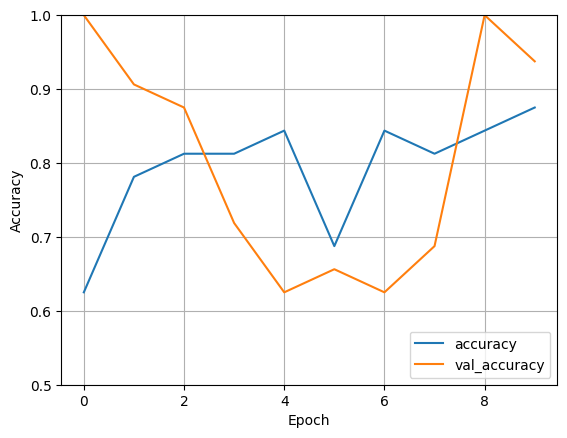

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)

test_loss, test_acc = model.evaluate(test_images, verbose=2)

In [77]:
print(test_acc)

0.9377431869506836
